# MODELOS ML

In [64]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.datasets as skds
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error, roc_auc_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import Modelos as m
import funciones as f

## Importar dataset

In [6]:
df_pred_sol = pd.read_csv("DATASETS/pred_solar.csv", index_col=0)

In [7]:
df_pred_sol

,indicativo,p_max,n_cub,glo,hr,n_gra,n_fog,inso,q_max,nw_55,...,nv_0100,ts_50,q_min,np_010,fecha,Año,Mes,geo_id,Comunidad,Energía Solar
0,1387,32.6(19),11.0,28536.0,75.0,1.0,5.0,4.7,1021.4(03),13.0,...,0.0,19.5,977.3(19),19.0,2023-10,2023,10,17,Galicia,1340.93
1,1387,36.4(05),12.0,16599.0,80.0,0.0,3.0,3.0,1024.7(22),12.0,...,0.0,15.5,983.0(04),18.0,2023-11,2023,11,17,Galicia,802.39
2,1387,56.8(27),8.0,14628.0,77.0,0.0,0.0,3.0,1032.2(20),13.0,...,0.0,13.1,992.5(01),18.0,2023-12,2023,12,17,Galicia,777.35
4,1387,22.0(19),11.0,17949.0,76.0,1.0,0.0,3.9,1027.1(04),10.0,...,0.0,12.3,993.1(16),15.0,2023-1,2023,1,17,Galicia,1035.82
5,1387,11.2(24),3.0,29027.0,67.0,2.0,1.0,6.9,1029.5(04),2.0,...,0.0,10.7,998.4(25),5.0,2023-2,2023,2,17,Galicia,1752.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,9434,8.0(03),2.0,NaN,43.0,0.0,0.0,11.6,994.3(28),4.0,...,0.0,NaN,980.0(11),5.0,2025-6,2025,6,5,Aragón,569025.36
1400,9434,10.4(11),1.0,NaN,46.0,0.0,0.0,11.8,994.7(03),11.0,...,0.0,NaN,975.4(20),4.0,2025-7,2025,7,5,Aragón,533817.89
1401,9434,7.8(27),0.0,NaN,45.0,0.0,0.0,10.9,992.5(10),6.0,...,0.0,NaN,975.4(31),3.0,2025-8,2025,8,5,Aragón,499960.60
1402,9434,19.6(28),2.0,NaN,53.0,0.0,0.0,9.5,995.0(16),4.0,...,0.0,NaN,981.4(03),2.0,2025-9,2025,9,5,Aragón,445332.24


In [8]:
df_pred_sol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225 entries, 0 to 1403
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indicativo     1225 non-null   object 
 1   p_max          1213 non-null   object 
 2   n_cub          995 non-null    float64
 3   glo            1056 non-null   float64
 4   hr             1166 non-null   float64
 5   n_gra          935 non-null    float64
 6   n_fog          935 non-null    float64
 7   inso           936 non-null    float64
 8   q_max          1076 non-null   object 
 9   nw_55          1149 non-null   float64
 10  q_mar          1076 non-null   float64
 11  q_med          1077 non-null   float64
 12  tm_min         1179 non-null   float64
 13  ta_max         1179 non-null   object 
 14  ts_min         1179 non-null   float64
 15  nt_30          1179 non-null   float64
 16  nv_0050        879 non-null    float64
 17  n_des          995 non-null    float64
 18  w_racha      

In [9]:
df_pred_sol.describe()

,n_cub,glo,hr,n_gra,n_fog,inso,nw_55,q_mar,q_med,tm_min,...,n_nie,tm_mes,tm_max,nv_0100,ts_50,np_010,Año,Mes,geo_id,Energía Solar
count,995.000000,1056.000000,1166.000000,935.000000,935.000000,936.000000,1149.000000,1076.000000,1077.000000,1179.000000,...,935.000000,1179.000000,1179.000000,879.000000,105.000000,1213.000000,1225.000000,1225.000000,1225.000000,1.225000e+03
mean,6.117588,52919.928030,63.046312,0.266310,2.432086,7.987073,2.984334,1017.128810,966.081894,11.804919,...,0.320856,17.179559,22.506446,0.050057,17.711429,5.160758,2023.971429,6.342857,10.257143,3.818226e+05
std,4.793234,22289.756183,14.189263,0.633376,3.993764,2.681809,3.871377,4.107435,58.699539,6.436371,...,1.420160,6.613898,7.278065,0.289917,6.961146,4.541308,0.810471,3.373048,5.502079,4.256651e+05
min,0.000000,12835.000000,16.000000,0.000000,0.000000,2.100000,0.000000,1008.400000,765.000000,-4.000000,...,0.000000,-0.700000,2.400000,0.000000,4.800000,0.000000,2023.000000,1.000000,4.000000,2.247000e+01
25%,2.000000,32885.000000,54.000000,0.000000,0.000000,5.900000,0.000000,1014.100000,938.900000,7.100000,...,0.000000,12.300000,17.050000,0.000000,12.300000,1.000000,2023.000000,3.000000,5.000000,2.834431e+04
50%,5.000000,53239.500000,65.000000,0.000000,1.000000,7.800000,2.000000,1016.100000,985.300000,11.800000,...,0.000000,17.300000,22.400000,0.000000,17.300000,4.000000,2024.000000,6.000000,8.000000,1.972723e+05
75%,9.000000,73239.750000,75.000000,0.000000,3.000000,10.200000,4.000000,1019.650000,1010.800000,16.700000,...,0.000000,22.200000,27.900000,0.000000,22.700000,8.000000,2025.000000,9.000000,16.000000,6.569789e+05
max,25.000000,99977.000000,93.000000,4.000000,26.000000,13.600000,23.000000,1030.200000,1024.900000,25.400000,...,19.000000,30.700000,40.100000,3.000000,31.900000,20.000000,2025.000000,12.000000,21.000000,1.740581e+06


In [ ]:
# Eliminamos columnas con pocos registros
df_pred_sol.drop(columns=["ts_10", "ts_20", "ts_50"],inplace=True)
df_pred_sol.drop(columns=["evap"],inplace=True)

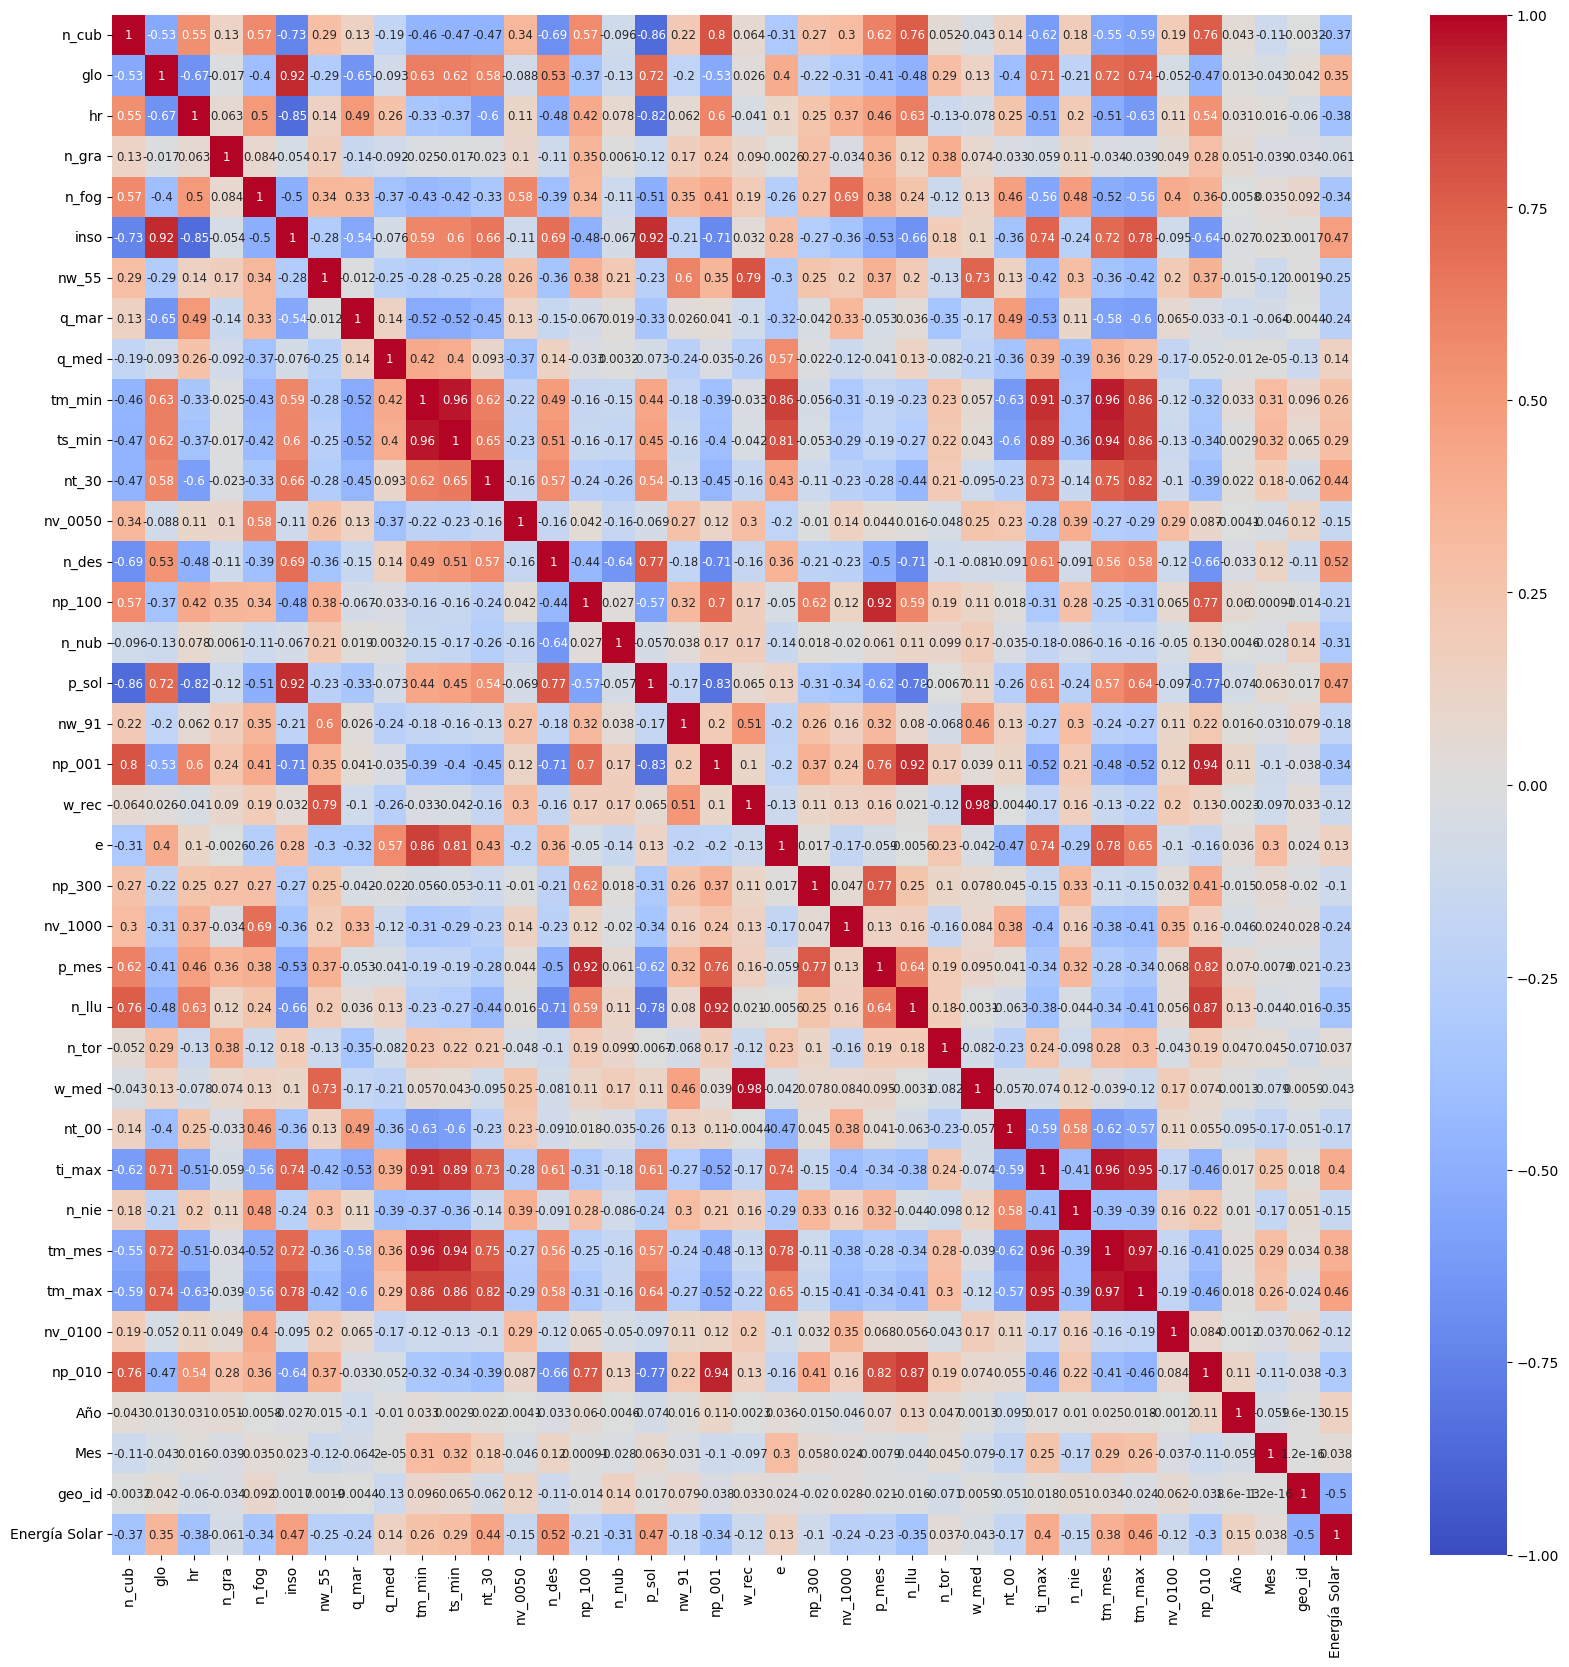

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df_pred_sol.corr(numeric_only=True), annot=True, annot_kws={"size": 'small'}, cmap="coolwarm", vmin=-1);


In [39]:
X = df_pred_sol[["glo","hr","inso","q_med","p_mes","p_sol","tm_mes"]]
y = df_pred_sol["Energía Solar"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)



In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225 entries, 0 to 1403
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   glo     1056 non-null   float64
 1   hr      1166 non-null   float64
 2   inso    936 non-null    float64
 3   q_med   1077 non-null   float64
 4   p_mes   1213 non-null   float64
 5   p_sol   936 non-null    float64
 6   tm_mes  1179 non-null   float64
dtypes: float64(7)
memory usage: 76.6 KB


In [40]:
X_max = df_pred_sol[["glo","hr","inso","q_med","p_mes","p_sol","tm_mes",
                     "nt_30","n_des","ti_max","tm_max"]]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_max,y, test_size = 0.2, random_state=42)



In [27]:
X_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   glo     1056 non-null   float64
 1   hr      1166 non-null   float64
 2   inso    936 non-null    float64
 3   q_med   1077 non-null   float64
 4   p_mes   1213 non-null   float64
 5   p_sol   936 non-null    float64
 6   tm_mes  1179 non-null   float64
 7   nt_30   1179 non-null   float64
 8   n_des   995 non-null    float64
 9   ti_max  1179 non-null   float64
 10  tm_max  1179 non-null   float64
dtypes: float64(11)
memory usage: 114.8 KB


In [ ]:
# Con X
xgb_reg = xgboost.XGBRegressor(random_state=42)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score:", r2_score(y_test, y_pred))

print("______________________________________________")

MAE: 171201.17195316483
MAPE: 37.34183234864862
MSE: 73517335743.36496
RMSE: 271140.80427586875
r2_score: 0.6421330505334308
______________________________________________


In [ ]:
# Con X_max
xgb_reg = xgboost.XGBRegressor(random_state=42)

xgb_reg.fit(X_train_m, y_train_m)
y_pred = xgb_reg.predict(X_test_m)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score:", r2_score(y_test, y_pred))

print("______________________________________________")

MAE: 155904.87172626355
MAPE: 24.698652428953142
MSE: 57145393324.60148
RMSE: 239051.0266127328
r2_score: 0.7218282276097301
______________________________________________


In [32]:
# Con X_max y parámetros XGB

xgb_reg = xgboost.XGBRegressor(n_estimators = 100, booster = "gbtree", max_depth = 10, random_state=42)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score:", r2_score(y_test, y_pred))

print("______________________________________________")

MAE: 147878.92530502382
MAPE: 16.746841042679126
MSE: 60491883642.9353
RMSE: 245950.9781296576
r2_score: 0.7055382156073621
______________________________________________


TypeError: 'XGBRegressor' object is not callable

In [ ]:
# GridSearch con XGBoost
parameters = {
    'n_estimators': np.arange(50,200,25),
    'booster': ["gbtree","gblinear"],
    'max_depth': [10, 20, 50],
}

xgb_model = xgboost.XGBRegressor(random_state=42)

clf_xgb = GridSearchCV(estimator = xgb_model,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 5,
                  scoring="neg_mean_absolute_error",
                  verbose=3)

clf_xgb.fit(X_train_m, y_train_m)

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'balanced_accuracy', 'jaccard', 'recall', 'recall_samples', 'top_k_accuracy', 'neg_mean_squared_error', 'jaccard_samples', 'neg_mean_gamma_deviance', 'homogeneity_score', 'neg_root_mean_squared_log_error', 'positive_likelihood_ratio', 'f1_micro', 'f1', 'average_precision', 'neg_mean_absolute_error', 'roc_auc_ovo_weighted', 'd2_brier_score', 'jaccard_macro', 'explained_variance', 'roc_auc_ovr_weighted', 'jaccard_micro', 'recall_macro', 'mutual_info_score', 'roc_auc', 'neg_mean_poisson_deviance', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'neg_negative_likelihood_ratio', 'precision_samples', 'f1_samples', 'd2_absolute_error_score', 'fowlkes_mallows_score', 'neg_max_error', 'f1_weighted', 'adjusted_rand_score', 'precision_weighted', 'completeness_score', 'v_measure_score', 'recall_weighted', 'd2_log_loss_score', 'r2', 'neg_log_loss', 'precision_micro', 'recall_micro', 'neg_median_absolute_error', 'accuracy', 'neg_mean_squared_log_error', 'jaccard_weighted', 'rand_score', 'neg_brier_score', 'f1_macro', 'precision', 'precision_macro', 'roc_auc_ovo', 'neg_mean_absolute_percentage_error', 'matthews_corrcoef', 'adjusted_mutual_info_score', 'roc_auc_ovr'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'absolute_error' instead.

In [54]:
print(clf_xgb.best_estimator_)
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=np.int64(50), n_jobs=None, num_parallel_tree=None, ...)
{'booster': 'gbtree', 'max_depth': 10, 'n_estimators': np.int64(50)}
-160540.11980338115


In [55]:
xgb_best = clf_xgb.best_estimator_
xgb_best.fit(X_train_m, y_train_m)
y_xgb = xgb_best.predict(X_test_m)

print("MAE:", mean_absolute_error(y_test_m, y_xgb))
print("MAPE:", mean_absolute_percentage_error(y_test_m, y_xgb))
print("MSE:", mean_squared_error(y_test_m, y_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_xgb)))
print("r2_score:", r2_score(y_test_m, y_xgb))


MAE: 147905.23326070732
MAPE: 16.663291314715718
MSE: 60488702463.717255
RMSE: 245944.51094447557
r2_score: 0.7055537009196486


In [59]:
# Escalamos X_max y probamos XGBoost con grid
pipe_xgb = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("xgb", xgboost.XGBRegressor(random_state=42))
])

xgb_param_grid = {
    "imputer__strategy": ['mean', 'median'],
    "xgb__n_estimators": np.arange(50, 200, 25),
    "xgb__booster": ["gbtree", "gblinear"],
    "xgb__max_depth": [10, 20, 50],
    "xgb__learning_rate": [0.01, 0.1] 
}
gs_xgb = GridSearchCV(
                estimator=pipe_xgb,
                param_grid=xgb_param_grid,
                cv=5,
                scoring="neg_mean_absolute_error",
                verbose=3,
                n_jobs=-1
)

grids = {"gs_xgb": gs_xgb}

gs_xgb.fit(X_train_m, y_train_m)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'imputer__strategy': ['mean', 'median'], 'xgb__booster': ['gbtree', 'gblinear'], 'xgb__learning_rate': [0.01, 0.1], 'xgb__max_depth': [10, 20, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_absolute_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.-

In [60]:
print(gs_xgb.best_score_)
print(gs_xgb.best_params_)
print(gs_xgb.best_estimator_)

-169009.98763616759
{'imputer__strategy': 'median', 'xgb__booster': 'gbtree', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': np.int64(175)}
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                 

In [61]:
gs_xgb_best = gs_xgb.best_estimator_
gs_xgb_best.fit(X_train_m, y_train_m)
y_gs_xgb = gs_xgb_best.predict(X_test_m)

print("MAE:", mean_absolute_error(y_test_m, y_gs_xgb))
print("MAPE:", mean_absolute_percentage_error(y_test_m, y_gs_xgb))
print("MSE:", mean_squared_error(y_test_m, y_gs_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_gs_xgb)))
print("r2_score:", r2_score(y_test_m, y_gs_xgb))

MAE: 175370.99367581363
MAPE: 20.43613210072058
MSE: 75696752902.02293
RMSE: 275130.428891504
r2_score: 0.6315241055506222


In [65]:
# Escalamos X_max, como se ha hecho en GS
X_train_m_sc, X_test_m_sc = f.escalar_X(X_train_m,X_test_m,tipoEscala="StandardScaler")

TypeError: cannot unpack non-iterable NoneType object

In [28]:
df_pred = df_pred_sol.dropna()

In [39]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 1359
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indicativo     43 non-null     object 
 1   p_max          43 non-null     object 
 2   n_cub          43 non-null     float64
 3   glo            43 non-null     float64
 4   hr             43 non-null     float64
 5   n_gra          43 non-null     float64
 6   n_fog          43 non-null     float64
 7   inso           43 non-null     float64
 8   q_max          43 non-null     object 
 9   nw_55          43 non-null     float64
 10  q_mar          43 non-null     float64
 11  q_med          43 non-null     float64
 12  tm_min         43 non-null     float64
 13  ta_max         43 non-null     object 
 14  ts_min         43 non-null     float64
 15  nt_30          43 non-null     float64
 16  nv_0050        43 non-null     float64
 17  n_des          43 non-null     float64
 18  w_racha        

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

print("______________________________________________")

In [ ]:
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

X_train, X_test, y_train, y_test = train_test_split(X_poly,y_train, test_size = 0.2, random_state=42)